In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from matplotlib.patches import ConnectionPatch

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

c:\Users\dnnlb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [3]:
df_train = pd.read_csv(r'C:\Users\dnnlb\Downloads\playground-series-s4e10/train.csv')
df_test  = pd.read_csv(r'C:\Users\dnnlb\Downloads\playground-series-s4e10/test.csv')
df_sub = pd.read_csv(r'C:\Users\dnnlb\Downloads\playground-series-s4e10/sample_submission.csv')

In [4]:
df_origi = pd.read_csv(r'C:\Users\dnnlb\Downloads\playground-series-s4e10/credit_risk_dataset.csv')

In [5]:
df_origi.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [6]:
df_origi.columns


Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [7]:
df_train.shape

(58645, 13)

In [8]:
df_train.head()

id  person_age  person_income person_home_ownership  person_emp_length  \
0   0          37          35000                  RENT                0.0   
1   1          22          56000                   OWN                6.0   
2   2          29          28800                   OWN                8.0   
3   3          30          70000                  RENT               14.0   
4   4          22          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0                         N                          14            0  
1                         N                           2            0  
2                         N                          10            0  
3                         N                           5            0  
4                         N                           3            0

In [9]:
df_train.describe()

id    person_age  person_income  person_emp_length  \
count  58645.000000  58645.000000   5.864500e+04       58645.000000   
mean   29322.000000     27.550857   6.404617e+04           4.701015   
std    16929.497605      6.033216   3.793111e+04           3.959784   
min        0.000000     20.000000   4.200000e+03           0.000000   
25%    14661.000000     23.000000   4.200000e+04           2.000000   
50%    29322.000000     26.000000   5.800000e+04           4.000000   
75%    43983.000000     30.000000   7.560000e+04           7.000000   
max    58644.000000    123.000000   1.900000e+06         123.000000   

          loan_amnt  loan_int_rate  loan_percent_income  \
count  58645.000000   58645.000000         58645.000000   
mean    9217.556518      10.677874             0.159238   
std     5563.807384       3.034697             0.091692   
min      500.000000       5.420000             0.000000   
25%     5000.000000       7.880000             0.090000   
50%     8000.000000      10.750000             0.140000   
75%    12000.000000      12.990000             0.210000   
max    35000.000000      23.220000             0.830000   

       cb_person_cred_hist_length   loan_status  
count                58645.000000  58645.000000  
mean                     5.813556      0.142382  
std                      4.029196      0.349445  
min                      2.000000      0.000000  
25%                      3.000000      0.000000  
50%                      4.000000      0.000000  
75%                      8.000000      0.000000  
max                     30.000000      1.000000

In [10]:
df_test.head()

id  person_age  person_income person_home_ownership  person_emp_length  \
0  58645          23          69000                  RENT                3.0   
1  58646          26          96000              MORTGAGE                6.0   
2  58647          26          30000                  RENT                5.0   
3  58648          33          50000                  RENT                4.0   
4  58649          26         102000              MORTGAGE                8.0   

         loan_intent loan_grade  loan_amnt  loan_int_rate  \
0    HOMEIMPROVEMENT          F      25000          15.76   
1           PERSONAL          C      10000          12.68   
2            VENTURE          E       4000          17.19   
3  DEBTCONSOLIDATION          A       7000           8.90   
4    HOMEIMPROVEMENT          D      15000          16.32   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.36                         N                           2  
1                 0.10                         Y                           4  
2                 0.13                         Y                           2  
3                 0.14                         N                           7  
4                 0.15                         Y                           4

In [11]:
df_sub.head()

id  loan_status
0  58645          0.5
1  58646          0.5
2  58647          0.5
3  58648          0.5
4  58649          0.5

In [12]:
df_train.shape,df_test.shape

((58645, 13), (39098, 12))

In [13]:
df_train = pd.concat([df_train,df_origi],axis=0)

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91226 entries, 0 to 32580
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  float64
 1   person_age                  91226 non-null  int64  
 2   person_income               91226 non-null  int64  
 3   person_home_ownership       91226 non-null  object 
 4   person_emp_length           90331 non-null  float64
 5   loan_intent                 91226 non-null  object 
 6   loan_grade                  91226 non-null  object 
 7   loan_amnt                   91226 non-null  int64  
 8   loan_int_rate               88110 non-null  float64
 9   loan_percent_income         91226 non-null  float64
 10  cb_person_default_on_file   91226 non-null  object 
 11  cb_person_cred_hist_length  91226 non-null  int64  
 12  loan_status                 91226 non-null  int64  
dtypes: float64(4), int64(5), object(4)
m

In [15]:
df_train.isnull().sum()

id                            32581
person_age                        0
person_income                     0
person_home_ownership             0
person_emp_length               895
loan_intent                       0
loan_grade                        0
loan_amnt                         0
loan_int_rate                  3116
loan_percent_income               0
cb_person_default_on_file         0
cb_person_cred_hist_length        0
loan_status                       0
dtype: int64

In [16]:
df_test.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [17]:
df_train['person_emp_length'].fillna(df_train['person_emp_length'].mean(), inplace=True)
df_train['loan_int_rate'].fillna(df_train['loan_int_rate'].mean(), inplace=True)

C:\Users\dnnlb\AppData\Local\Temp\ipykernel_18060\1278148906.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['person_emp_length'].fillna(df_train['person_emp_length'].mean(), inplace=True)
C:\Users\dnnlb\AppData\Local\Temp\ipykernel_18060\1278148906.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [18]:
df_train.isnull().sum()


id                            32581
person_age                        0
person_income                     0
person_home_ownership             0
person_emp_length                 0
loan_intent                       0
loan_grade                        0
loan_amnt                         0
loan_int_rate                     0
loan_percent_income               0
cb_person_default_on_file         0
cb_person_cred_hist_length        0
loan_status                       0
dtype: int64

Exploratory data Analysis

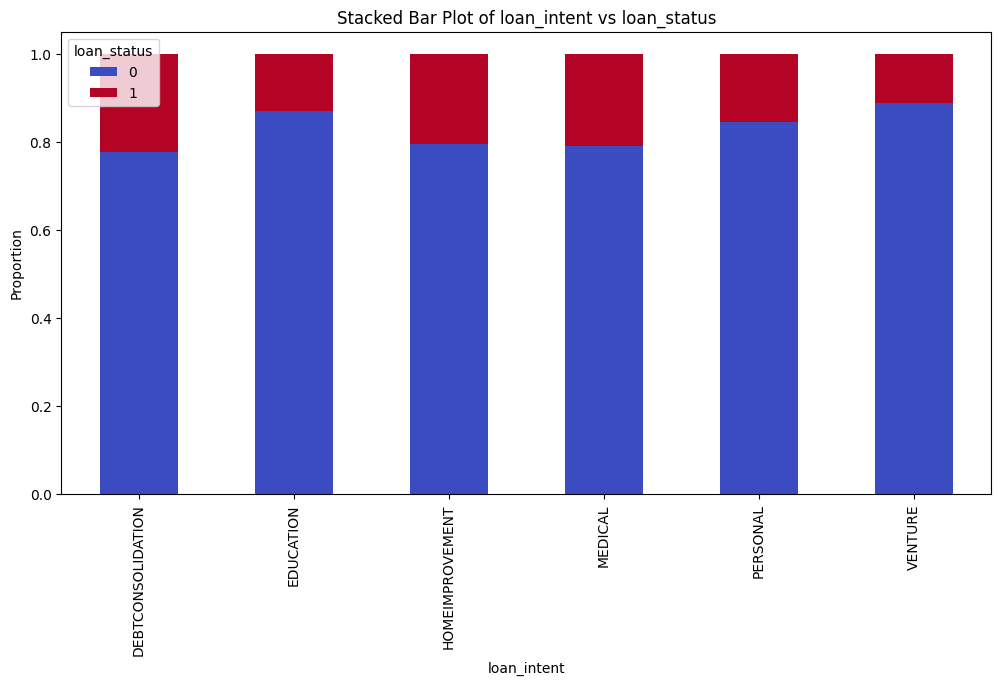

In [19]:
def stacked_bar_plot(df, feature, target='loan_status'):
    crosstab = pd.crosstab(df[feature], df[target], normalize='index')
    crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='coolwarm')
    plt.title(f'Stacked Bar Plot of {feature} vs {target}')
    plt.ylabel('Proportion')
    plt.show()
stacked_bar_plot(df_train, 'loan_intent')

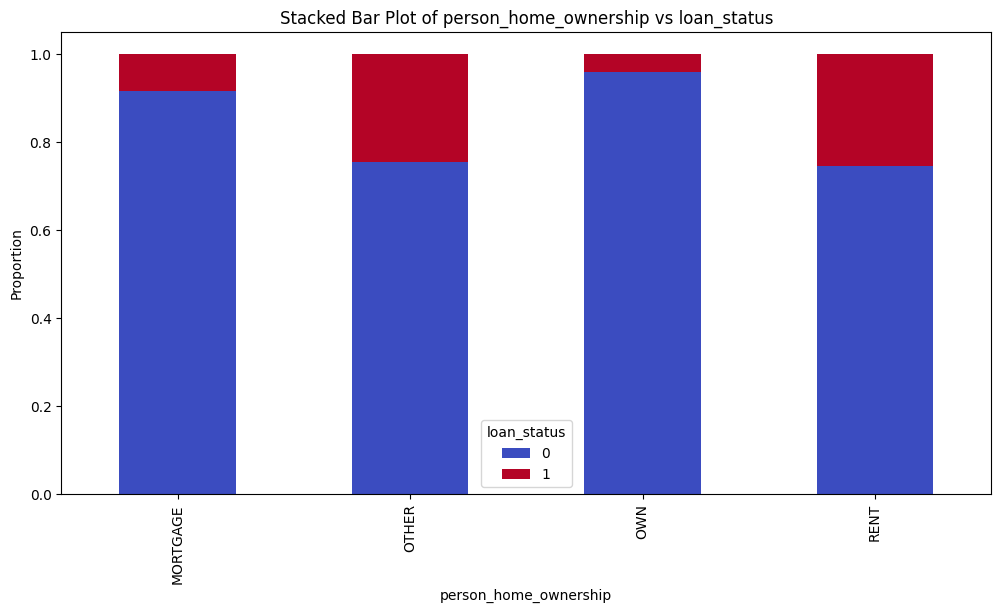

In [20]:
stacked_bar_plot(df_train, 'person_home_ownership')

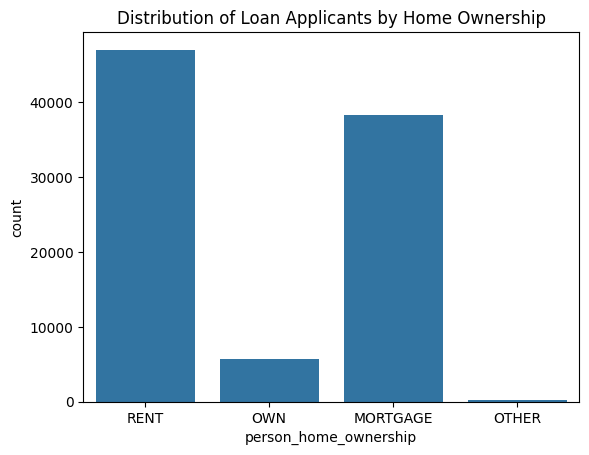

In [21]:
sns.countplot(data=df_train, x='person_home_ownership')
plt.title('Distribution of Loan Applicants by Home Ownership')
plt.show()

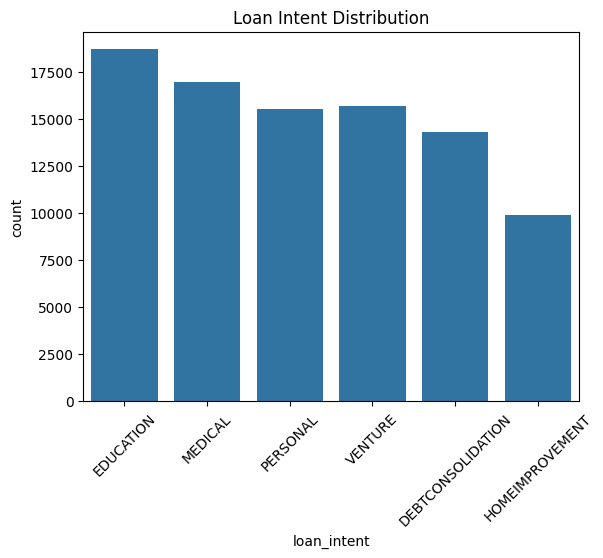

In [22]:
sns.countplot(data=df_train, x='loan_intent')
plt.title('Loan Intent Distribution')
plt.xticks(rotation=45)
plt.show()

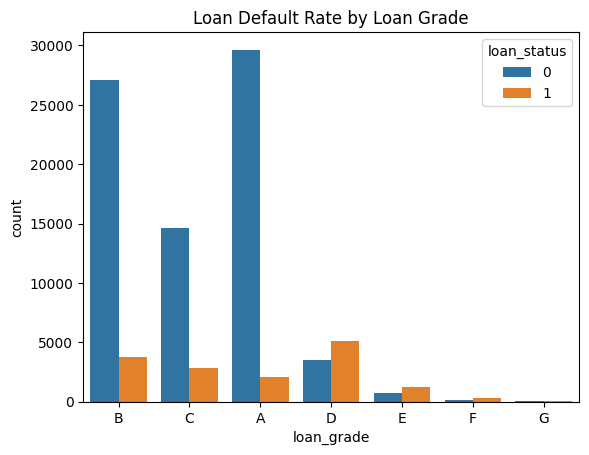

In [23]:
sns.countplot(data=df_train, x='loan_grade', hue='loan_status')
plt.title('Loan Default Rate by Loan Grade')
plt.show()

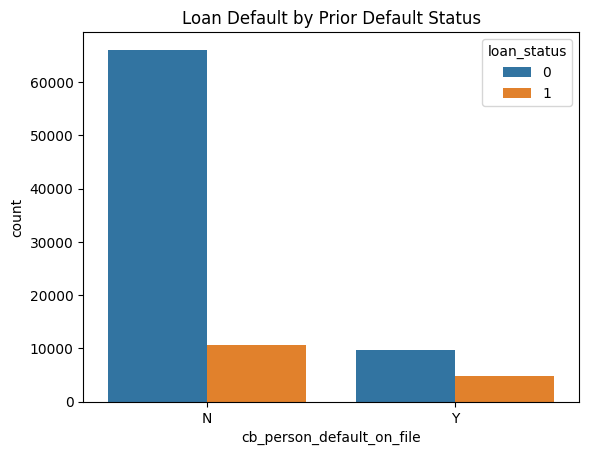

In [24]:
sns.countplot(data=df_train, x='cb_person_default_on_file', hue='loan_status')
plt.title('Loan Default by Prior Default Status')
plt.show()

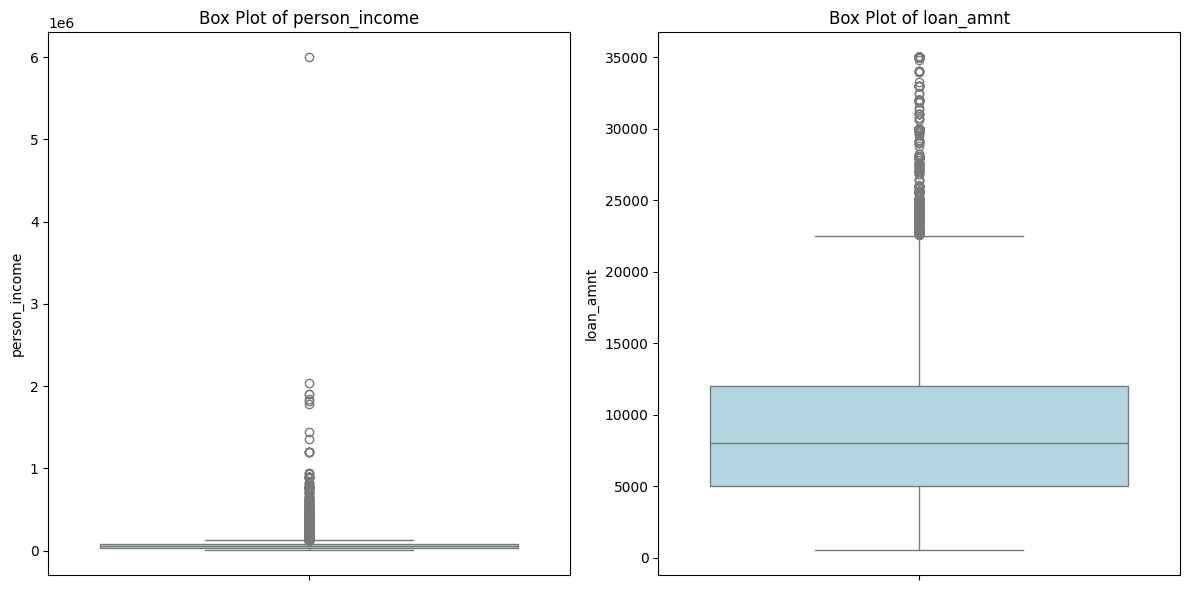

In [25]:
def plot_boxplots(df, columns):
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(columns, 1):
        plt.subplot(1, len(columns), i)
        sns.boxplot(y=df[col], color='lightblue')
        plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

plot_boxplots(df_train, ['person_income', 'loan_amnt'])

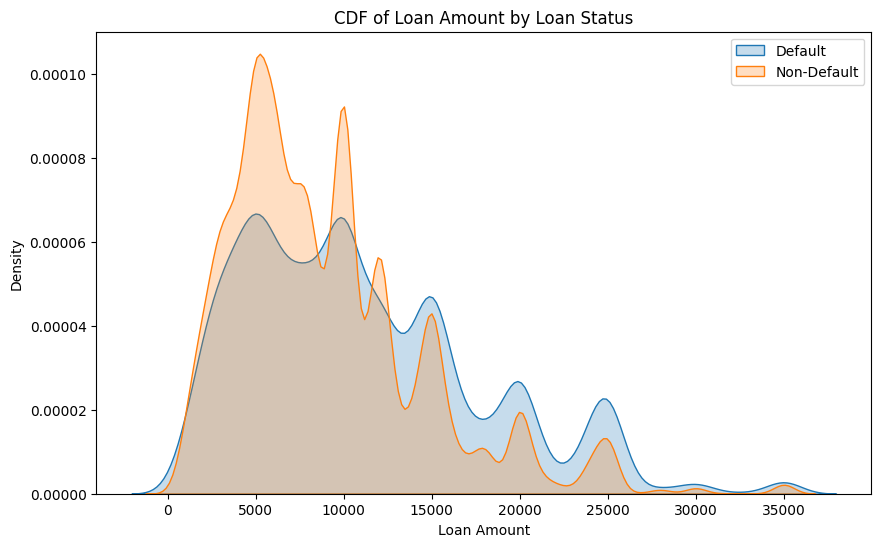

In [26]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_train[df_train['loan_status'] == 1]['loan_amnt'], label='Default', fill=True)
sns.kdeplot(df_train[df_train['loan_status'] == 0]['loan_amnt'], label='Non-Default', fill=True)
plt.title('CDF of Loan Amount by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

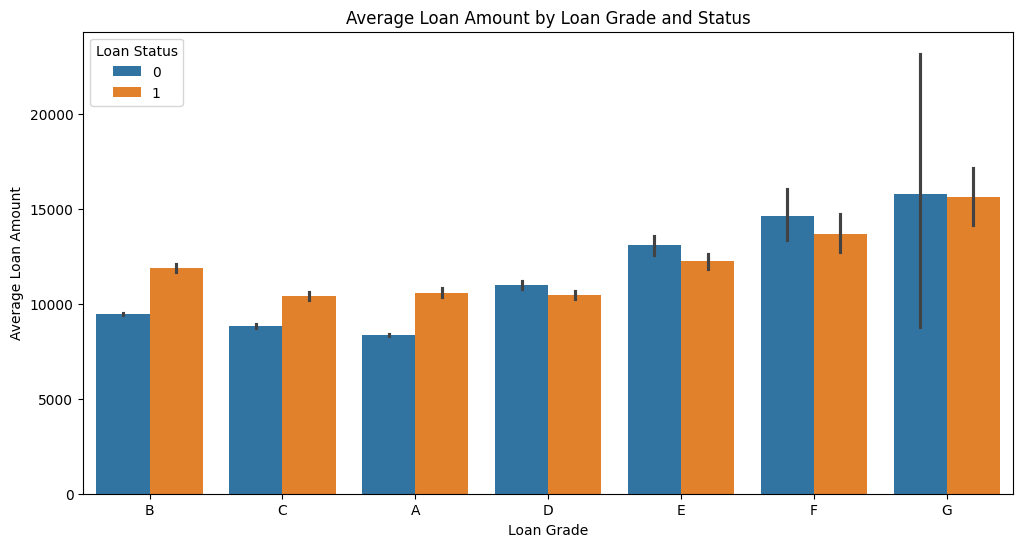

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x='loan_grade', y='loan_amnt', hue='loan_status', data=df_train, estimator=np.mean)
plt.title('Average Loan Amount by Loan Grade and Status')
plt.xlabel('Loan Grade')
plt.ylabel('Average Loan Amount')
plt.legend(title='Loan Status')
plt.show()

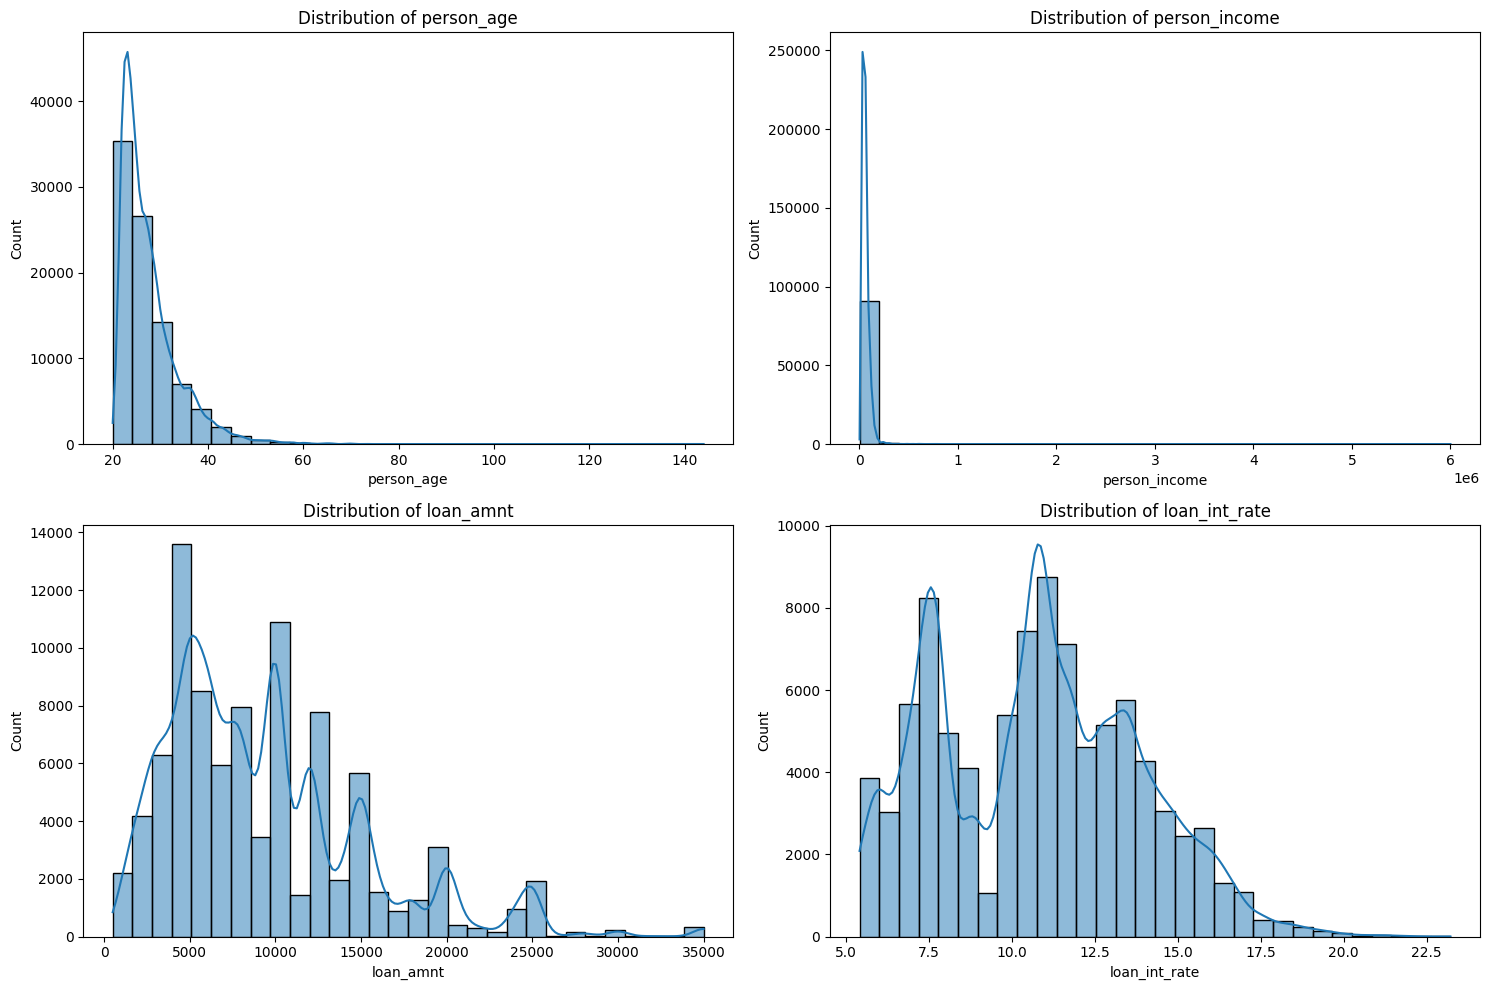

In [28]:
num_features = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_train[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

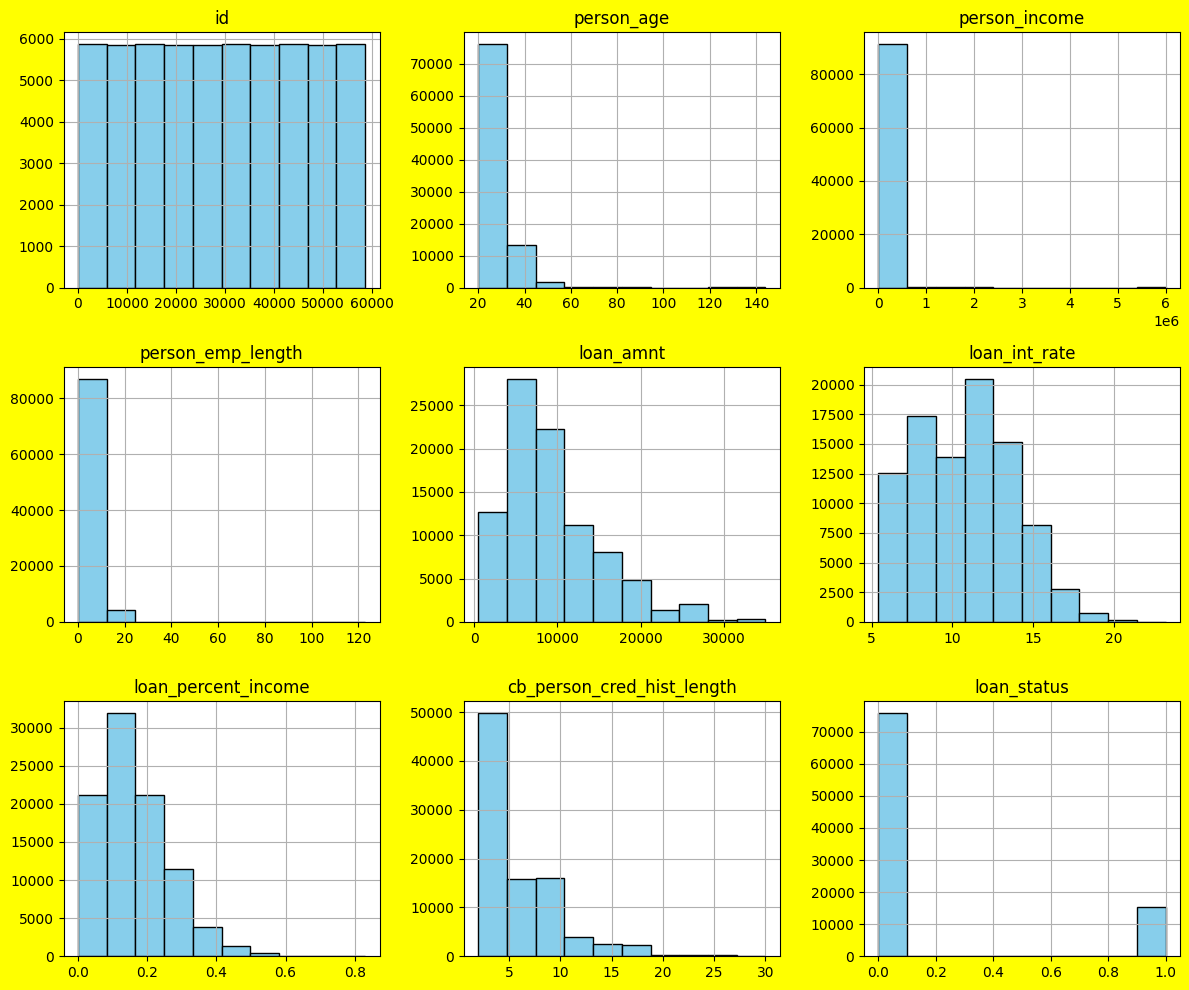

In [29]:
df_train.hist(figsize=(12, 10), color='skyblue', edgecolor='black')
plt.gcf().set_facecolor('yellow')
plt.tight_layout()
plt.show()

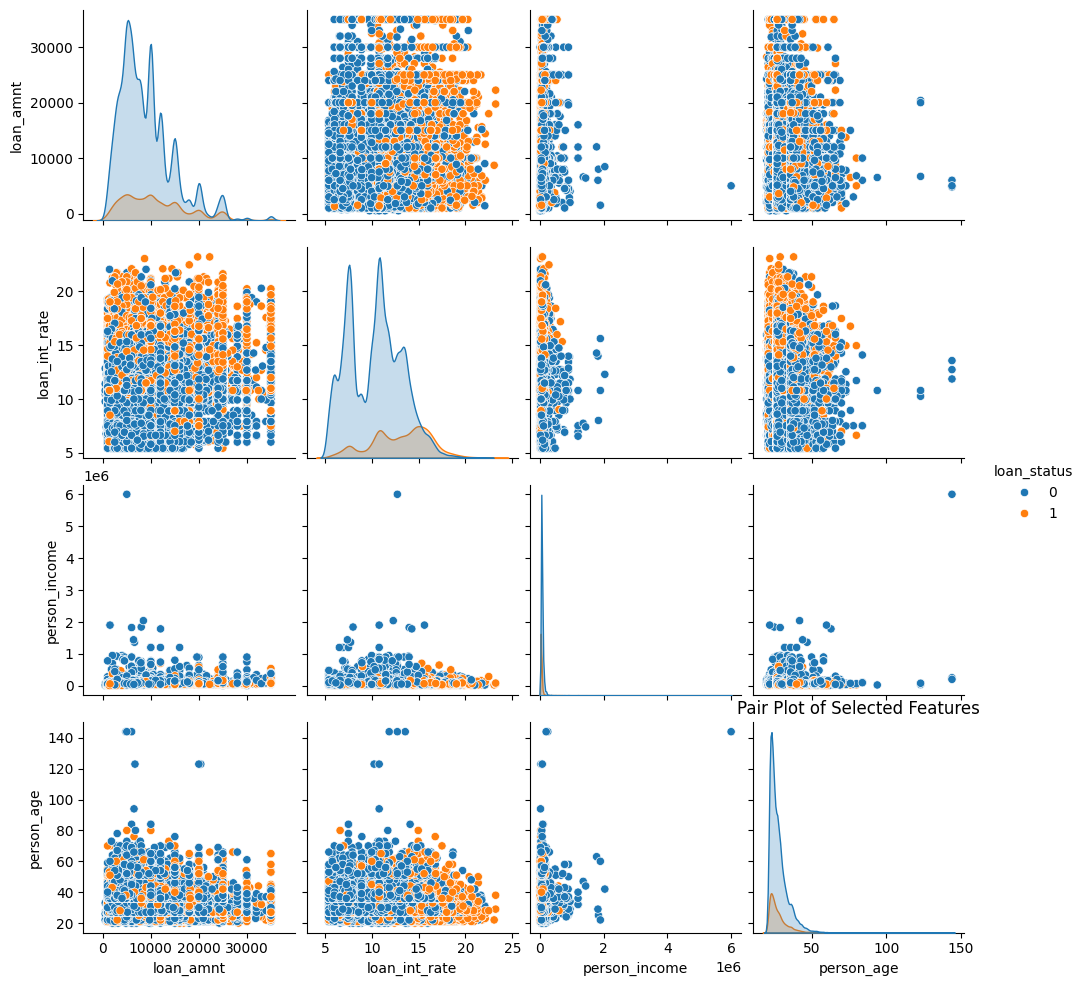

In [30]:
subset_features = ['loan_amnt', 'loan_int_rate', 'person_income', 'person_age', 'loan_status']
sns.pairplot(df_train[subset_features], hue='loan_status')
plt.title('Pair Plot of Selected Features')
plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df_train, df_test):  
    label_enc = LabelEncoder()   
    label_cols = ['person_home_ownership', 'loan_grade', 'cb_person_default_on_file']    
    for col in label_cols:
        df_train[col] = label_enc.fit_transform(df_train[col])
        df_test[col] = label_enc.transform(df_test[col])    
    df_train = pd.get_dummies(df_train, columns=['loan_intent'], drop_first=True)
    df_test = pd.get_dummies(df_test, columns=['loan_intent'], drop_first=True) 
    target_col = 'loan_status'
    train_columns = df_train.drop(columns=[target_col]).columns    
    df_test = df_test.reindex(columns=train_columns, fill_value=0)    
    return df_train, df_test

df_train_processed, df_test_processed = preprocess_data(df_train, df_test)

In [32]:
df_train = df_train_processed
df_test = df_test_processed

In [33]:
df_train.shape,df_test.shape

((91226, 17), (39098, 16))

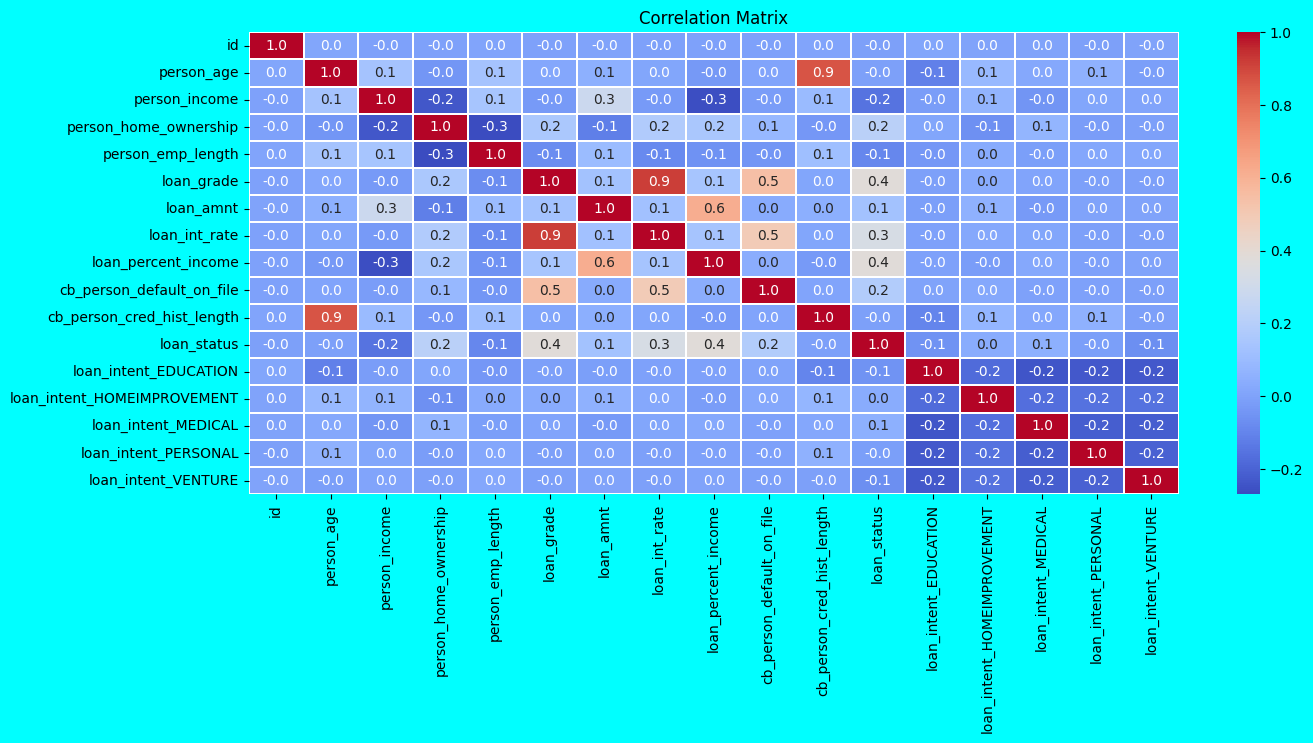

In [34]:
correlation_matrix = df_train.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.2)
plt.gcf().set_facecolor('#00FFFF')  
plt.title('Correlation Matrix')
plt.show()

In [35]:
df_train.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_grade', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

In [36]:
df_test.isnull().sum()

id                             0
person_age                     0
person_income                  0
person_home_ownership          0
person_emp_length              0
loan_grade                     0
loan_amnt                      0
loan_int_rate                  0
loan_percent_income            0
cb_person_default_on_file      0
cb_person_cred_hist_length     0
loan_intent_EDUCATION          0
loan_intent_HOMEIMPROVEMENT    0
loan_intent_MEDICAL            0
loan_intent_PERSONAL           0
loan_intent_VENTURE            0
dtype: int64

In [37]:
def feature_engineering(df):
    
    df['loan_to_income_ratio'] = df['loan_amnt'] / df['person_income']  
    df['financial_burden'] = df['loan_amnt'] * df['loan_int_rate'] 
    df['income_per_year_emp'] = df['person_income'] / (df['person_emp_length'])
    df['cred_hist_to_age_ratio'] = df['cb_person_cred_hist_length'] / df['person_age']
    df['int_to_loan_ratio'] = df['loan_int_rate'] / df['loan_amnt']
    df['loan_int_emp_interaction'] = df['loan_int_rate'] * df['person_emp_length']
    df['debt_to_credit_ratio'] = df['loan_amnt'] / df['cb_person_cred_hist_length'] 
    df['int_to_cred_hist'] = df['loan_int_rate'] / df['cb_person_cred_hist_length']  
    df['int_per_year_emp'] = df['loan_int_rate'] / (df['person_emp_length'])
    df['loan_amt_per_emp_year'] = df['loan_amnt'] / (df['person_emp_length'])      
    df['income_to_loan_ratio'] = df['person_income'] / df['loan_amnt'] 
    
    return df

#median_income = df_train['person_income'].median()
df_train = feature_engineering(df_train)
df_test = feature_engineering(df_test)

In [38]:
y = df_train['loan_status'] 
df_train = df_train.drop(['loan_status'],axis=1)
X = df_train

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_data = df_train
scaled_test_data = df_test

In [40]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

# LightGBM parameters
lgb_params = {
    'objective': 'binary',
    'n_estimators': 3000,  # Fixed number of boosting rounds
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'random_state': 42,
    'learning_rate': 0.0322942967545754,
    'num_leaves': 24,
    'max_depth': 15,
    'min_data_in_leaf': 25,
    'feature_fraction': 0.6236144085285287,
    'bagging_fraction': 0.9596685778433888,
    'bagging_freq': 3,
    'verbose': -1
}

# Stratified K-Fold settings
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize storage for predictions
oof_predictions = np.zeros(len(scaled_train_data))  # Out-of-fold predictions
oof_true_labels = np.zeros(len(scaled_train_data))  # True labels for validation
test_predictions = np.zeros(len(scaled_test_data))  # Average predictions for test data

# Custom callback for logging progress
def log_progress(env):
    """Logs AUC metric at regular intervals during training."""
    if env.iteration % 100 == 0:  # Log every 100 iterations
        auc = env.evaluation_result_list[0][2]  # Extract AUC value
        print(f"Iteration {env.iteration}: AUC={auc:.4f}")

# Cross-validation loop
for fold, (train_idx, val_idx) in enumerate(skf.split(scaled_train_data, y)):
    print(f"Training fold {fold + 1}/{n_splits}...")
    
    # Split data
    X_train, X_val = scaled_train_data.iloc[train_idx], scaled_train_data.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Train LightGBM model
    lgbm_model = LGBMClassifier(**lgb_params)

    lgbm_model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='auc',
        callbacks=[
            log_progress
        ]
    )

    # Predictions for validation and test sets
    val_preds = lgbm_model.predict_proba(X_val)[:, 1]
    test_preds = lgbm_model.predict_proba(scaled_test_data)[:, 1]

    # Store predictions
    oof_predictions[val_idx] = val_preds
    oof_true_labels[val_idx] = y_val
    test_predictions += test_preds / n_splits

# Calculate overall AUC
overall_auc = roc_auc_score(oof_true_labels, oof_predictions)
print("Overall AUC (LGBMClassifier with StratifiedKFold):", overall_auc)


Training fold 1/5...
Iteration 0: AUC=0.8815
Iteration 100: AUC=0.9447
Iteration 200: AUC=0.9544
Iteration 300: AUC=0.9571
Iteration 400: AUC=0.9582
Iteration 500: AUC=0.9588
Iteration 600: AUC=0.9595
Iteration 700: AUC=0.9597
Iteration 800: AUC=0.9602
Iteration 900: AUC=0.9604
Iteration 1000: AUC=0.9607
Iteration 1100: AUC=0.9608
Iteration 1200: AUC=0.9611
Iteration 1300: AUC=0.9612
Iteration 1400: AUC=0.9613
Iteration 1500: AUC=0.9614
Iteration 1600: AUC=0.9616
Iteration 1700: AUC=0.9618
Iteration 1800: AUC=0.9618
Iteration 1900: AUC=0.9619
Iteration 2000: AUC=0.9620
Iteration 2100: AUC=0.9620
Iteration 2200: AUC=0.9620
Iteration 2300: AUC=0.9619
Iteration 2400: AUC=0.9619
Iteration 2500: AUC=0.9619
Iteration 2600: AUC=0.9619
Iteration 2700: AUC=0.9618
Iteration 2800: AUC=0.9618
Iteration 2900: AUC=0.9619
Training fold 2/5...
Iteration 0: AUC=0.8703
Iteration 100: AUC=0.9448
Iteration 200: AUC=0.9550
Iteration 300: AUC=0.9580
Iteration 400: AUC=0.9589
Iteration 500: AUC=0.9599
Iterat

In [41]:
catboost_params = {
    'depth': 7,
    'learning_rate': 0.19893301995319765,
    'bagging_temperature': 0.7979373495258176,
    'l2_leaf_reg': 5,
    'loss_function': 'Logloss',
    'iterations': 400,
    'grow_policy': 'Lossguide',
    'eval_metric': 'AUC',
}

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

catboost_predictions = np.zeros(len(scaled_train_data))
catboost_true_labels = np.zeros(len(scaled_train_data))
catboost_test_predictions = np.zeros(len(scaled_test_data))

for fold, (train_idx, val_idx) in enumerate(skf.split(scaled_train_data, y)):
    X_train, X_val = scaled_train_data.iloc[train_idx], scaled_train_data.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    catboost_model = CatBoostClassifier(**catboost_params)
    catboost_model.fit(X_train, y_train,
                       eval_set=(X_val, y_val),
                       early_stopping_rounds=10,
                       verbose=True)
  
    catboost_fold_preds = catboost_model.predict_proba(X_val)[:, 1]  
    catboost_fold_test_preds = catboost_model.predict_proba(scaled_test_data)[:, 1]  
    catboost_predictions[val_idx] = catboost_fold_preds
    catboost_true_labels[val_idx] = y_val    
    catboost_test_predictions += catboost_fold_test_preds / n_splits
overall_metric_catboost = roc_auc_score(catboost_true_labels, catboost_predictions)
print("Overall AUC (CatBoostClassifier with StratifiedKFold):", overall_metric_catboost)

0:	test: 0.8509937	best: 0.8509937 (0)	total: 182ms	remaining: 1m 12s
1:	test: 0.8699726	best: 0.8699726 (1)	total: 220ms	remaining: 43.7s
2:	test: 0.8826837	best: 0.8826837 (2)	total: 261ms	remaining: 34.5s
3:	test: 0.9015775	best: 0.9015775 (3)	total: 302ms	remaining: 29.9s
4:	test: 0.9096016	best: 0.9096016 (4)	total: 338ms	remaining: 26.7s
5:	test: 0.9117559	best: 0.9117559 (5)	total: 371ms	remaining: 24.4s
6:	test: 0.9215936	best: 0.9215936 (6)	total: 410ms	remaining: 23s
7:	test: 0.9258940	best: 0.9258940 (7)	total: 448ms	remaining: 22s
8:	test: 0.9293992	best: 0.9293992 (8)	total: 490ms	remaining: 21.3s
9:	test: 0.9327246	best: 0.9327246 (9)	total: 529ms	remaining: 20.6s
10:	test: 0.9328698	best: 0.9328698 (10)	total: 568ms	remaining: 20.1s
11:	test: 0.9327821	best: 0.9328698 (10)	total: 609ms	remaining: 19.7s
12:	test: 0.9358754	best: 0.9358754 (12)	total: 655ms	remaining: 19.5s
13:	test: 0.9365420	best: 0.9365420 (13)	total: 698ms	remaining: 19.3s
14:	test: 0.9369533	best: 0.9

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

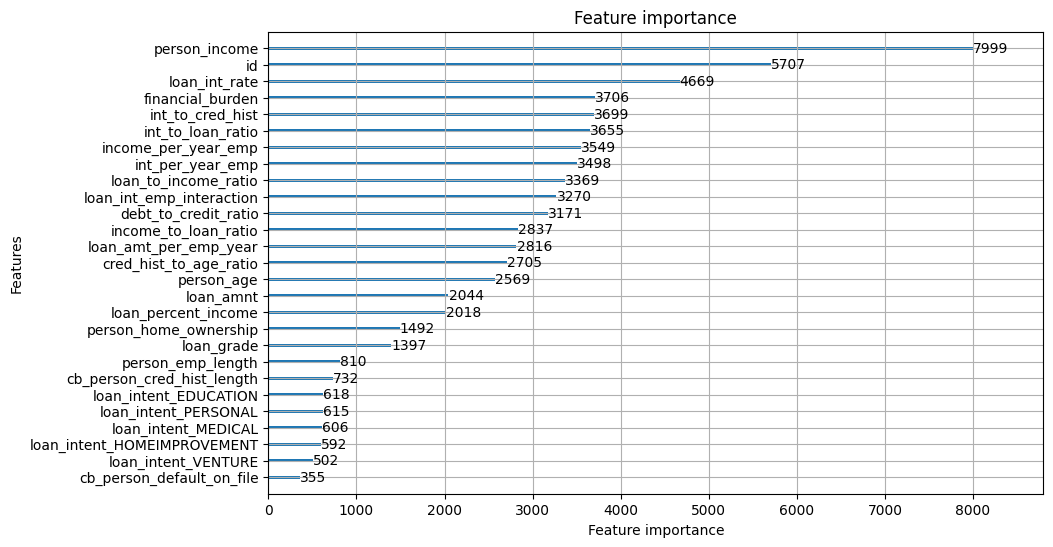

In [42]:
from lightgbm import plot_importance
plot_importance(lgbm_model,figsize=(10, 6))

In [43]:
lgbm_model

LGBMClassifier(bagging_fraction=0.9596685778433888, bagging_freq=3,
               feature_fraction=0.6236144085285287,
               learning_rate=0.0322942967545754, max_depth=15,
               metric='binary_logloss', min_data_in_leaf=25, n_estimators=3000,
               num_leaves=24, objective='binary', random_state=42, verbose=-1)

In [44]:
import lime
import lime.lime_tabular

In [45]:
df_train.shape

(91226, 27)

In [46]:
df_train.head()

id  person_age  person_income  person_home_ownership  person_emp_length  \
0  0.0          37          35000                      3                0.0   
1  1.0          22          56000                      2                6.0   
2  2.0          29          28800                      2                8.0   
3  3.0          30          70000                      3               14.0   
4  4.0          22          60000                      3                2.0   

   loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0           1       6000          11.49                 0.17   
1           2       4000          13.35                 0.07   
2           0       6000           8.90                 0.21   
3           1      12000          11.11                 0.17   
4           0       6000           6.92                 0.10   

   cb_person_default_on_file  ...  financial_burden  income_per_year_emp  \
0                          0  ...           68940.0                  inf   
1                          0  ...           53400.0         9.333333e+03   
2                          0  ...           53400.0         3.600000e+03   
3                          0  ...          133320.0         5.000000e+03   
4                          0  ...           41520.0         3.000000e+04   

   cred_hist_to_age_ratio  int_to_loan_ratio  loan_int_emp_interaction  \
0                0.378378           0.001915                      0.00   
1                0.090909           0.003337                     80.10   
2                0.344828           0.001483                     71.20   
3                0.166667           0.000926                    155.54   
4                0.136364           0.001153                     13.84   

   debt_to_credit_ratio  int_to_cred_hist  int_per_year_emp  \
0            428.571429          0.820714               inf   
1           2000.000000          6.675000          2.225000   
2            600.000000          0.890000          1.112500   
3           2400.000000          2.222000          0.793571   
4           2000.000000          2.306667          3.460000   

   loan_amt_per_emp_year  income_to_loan_ratio  
0                    inf              5.833333  
1             666.666667             14.000000  
2             750.000000              4.800000  
3             857.142857              5.833333  
4            3000.000000             10.000000  

[5 rows x 27 columns]

In [47]:
df_test.shape

(39098, 27)

In [48]:
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)
df_train.fillna(df_train.mean(), inplace=True)
print("DataFrame after replacing inf with column means:")
df_train.head()

DataFrame after replacing inf with column means:


id  person_age  person_income  person_home_ownership  person_emp_length  \
0  0.0          37          35000                      3                0.0   
1  1.0          22          56000                      2                6.0   
2  2.0          29          28800                      2                8.0   
3  3.0          30          70000                      3               14.0   
4  4.0          22          60000                      3                2.0   

   loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0           1       6000          11.49                 0.17   
1           2       4000          13.35                 0.07   
2           0       6000           8.90                 0.21   
3           1      12000          11.11                 0.17   
4           0       6000           6.92                 0.10   

   cb_person_default_on_file  ...  financial_burden  income_per_year_emp  \
0                          0  ...           68940.0         19519.454848   
1                          0  ...           53400.0          9333.333333   
2                          0  ...           53400.0          3600.000000   
3                          0  ...          133320.0          5000.000000   
4                          0  ...           41520.0         30000.000000   

   cred_hist_to_age_ratio  int_to_loan_ratio  loan_int_emp_interaction  \
0                0.378378           0.001915                      0.00   
1                0.090909           0.003337                     80.10   
2                0.344828           0.001483                     71.20   
3                0.166667           0.000926                    155.54   
4                0.136364           0.001153                     13.84   

   debt_to_credit_ratio  int_to_cred_hist  int_per_year_emp  \
0            428.571429          0.820714          3.451274   
1           2000.000000          6.675000          2.225000   
2            600.000000          0.890000          1.112500   
3           2400.000000          2.222000          0.793571   
4           2000.000000          2.306667          3.460000   

   loan_amt_per_emp_year  income_to_loan_ratio  
0            2878.295562              5.833333  
1             666.666667             14.000000  
2             750.000000              4.800000  
3             857.142857              5.833333  
4            3000.000000             10.000000  

[5 rows x 27 columns]

In [49]:
df_test.replace([np.inf, -np.inf], np.nan, inplace=True)
df_test.fillna(df_test.mean(), inplace=True)
print("DataFrame after replacing inf with column means:")
df_test.head()

DataFrame after replacing inf with column means:


id  person_age  person_income  person_home_ownership  person_emp_length  \
0  58645          23          69000                      3                3.0   
1  58646          26          96000                      0                6.0   
2  58647          26          30000                      3                5.0   
3  58648          33          50000                      3                4.0   
4  58649          26         102000                      0                8.0   

   loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0           5      25000          15.76                 0.36   
1           2      10000          12.68                 0.10   
2           4       4000          17.19                 0.13   
3           0       7000           8.90                 0.14   
4           3      15000          16.32                 0.15   

   cb_person_default_on_file  ...  financial_burden  income_per_year_emp  \
0                          0  ...          394000.0              23000.0   
1                          1  ...          126800.0              16000.0   
2                          1  ...           68760.0               6000.0   
3                          0  ...           62300.0              12500.0   
4                          1  ...          244800.0              12750.0   

   cred_hist_to_age_ratio  int_to_loan_ratio  loan_int_emp_interaction  \
0                0.086957           0.000630                     47.28   
1                0.153846           0.001268                     76.08   
2                0.076923           0.004298                     85.95   
3                0.212121           0.001271                     35.60   
4                0.153846           0.001088                    130.56   

   debt_to_credit_ratio  int_to_cred_hist  int_per_year_emp  \
0               12500.0          7.880000          5.253333   
1                2500.0          3.170000          2.113333   
2                2000.0          8.595000          3.438000   
3                1000.0          1.271429          2.225000   
4                3750.0          4.080000          2.040000   

   loan_amt_per_emp_year  income_to_loan_ratio  
0            8333.333333              2.760000  
1            1666.666667              9.600000  
2             800.000000              7.500000  
3            1750.000000              7.142857  
4            1875.000000              6.800000  

[5 rows x 27 columns]

In [50]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(X_train.mean(), inplace=True)
X = X_train.values
explainer = lime.lime_tabular.LimeTabularExplainer(X, 
                                                   feature_names=X_train.columns, 
                                                   class_names=['0', '1'], 
                                                   kernel_width=5)

C:\Users\dnnlb\AppData\Local\Temp\ipykernel_18060\1230043500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\dnnlb\AppData\Local\Temp\ipykernel_18060\1230043500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


In [59]:
redict_fn_lgb = lambda x: lgbm_model.predict_proba(x).astype(float)


In [61]:
choosen_instance = X_val.loc[[32558]].fillna(X_val.mean()).values[0]

exp = explainer.explain_instance(choosen_instance, redict_fn_lgb,num_features=15)
exp.show_in_notebook(show_all=False)

In [63]:
choosen_instance = X_val.loc[[32558]].fillna(X_val.mean()).values[0]
exp = explainer.explain_instance(choosen_instance, redict_fn_lgb,num_features=15)
exp.show_in_notebook(show_all=False)

In [64]:
choosen_instance = X_val.loc[[25]].fillna(X_val.mean()).values[0]
exp = explainer.explain_instance(choosen_instance, redict_fn_lgb,num_features=15)
exp.show_in_notebook(show_all=False)

In [65]:
choosen_instance = X_val.loc[[10]].fillna(X_val.mean()).values[0]
exp = explainer.explain_instance(choosen_instance, redict_fn_lgb,num_features=15)
exp.show_in_notebook(show_all=False)

In [66]:
df_sub.head()

id  loan_status
0  58645          0.5
1  58646          0.5
2  58647          0.5
3  58648          0.5
4  58649          0.5

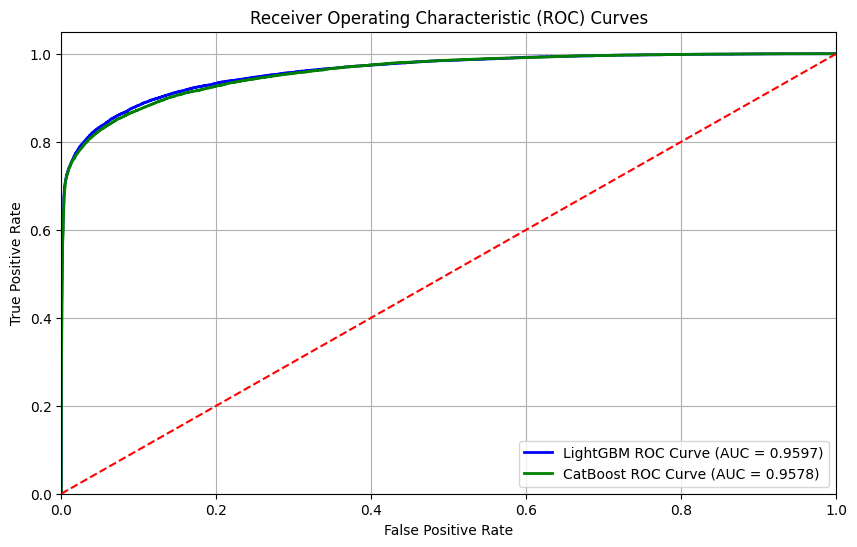

In [71]:
from sklearn.metrics import roc_curve, auc
fpr_lgbm, tpr_lgbm, _ = roc_curve(oof_true_labels, oof_predictions)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

fpr_catboost, tpr_catboost, _ = roc_curve(catboost_true_labels, catboost_predictions)
roc_auc_catboost = auc(fpr_catboost, tpr_catboost)


plt.figure(figsize=(10, 6))
plt.plot(fpr_lgbm, tpr_lgbm, color='blue', lw=2, label=f'LightGBM ROC Curve (AUC = {roc_auc_lgbm:.4f})')
plt.plot(fpr_catboost, tpr_catboost, color='green', lw=2, label=f'CatBoost ROC Curve (AUC = {roc_auc_catboost:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [81]:
# Align predictions if necessary
min_length = min(len(oof_predictions), len(catboost_test_predictions))
oof_predictions = oof_predictions[:min_length]
catboost_test_predictions = catboost_test_predictions[:min_length]

# Combine predictions
df_sub['loan_status'] = oof_predictions * 0.2 + catboost_test_predictions * 0.8


In [82]:
df_sub.head()

id  loan_status
0  58645     0.809503
1  58646     0.027333
2  58647     0.328668
3  58648     0.009775
4  58649     0.040212